# Logistic regression

#### 당신은 대학의 입학처장입니다. 지원자들의 지난 2개의 시험의 성적에 기반하여 이들의 합격 여부를 결정하고자 합니다. 
#### 다행히 예전에 지원자들의 지난 2개의 시험 성적에 기반해 합격/불합격 데이터가 있습니다. 
#### 이를 기반으로 학습한 후에 이번 지원자들의 합격 여부를 예측해 보도록 합니다. 
#### 우리는 이를 위해 logistic regression 기법을 사용할 것입니다.



In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

/Users/andymac/virtual_python/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


# 1단계. Training Set의 데이터 전처리

In [2]:
path = os.getcwd() + '/data/ex2data1.txt'
data = pd.read_csv(path, header=None, names = ['Exam1', 'Exam2', 'Admitted'])

In [3]:
data.head()

,Exam1,Exam2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [4]:
# 합격과 불합격으로 나눠주자

# isin() 은 filtering method
# http://pandas.pydata.org/pandas-docs/stable/10min.html 참고 
positive = data[data['Admitted'].isin([1])]
positive.head()

,Exam1,Exam2,Admitted
3,60.182599,86.308552,1
4,79.032736,75.344376,1
6,61.106665,96.511426,1
7,75.024746,46.554014,1
8,76.098787,87.420570,1


In [5]:
negative = data[data['Admitted'].isin([0])]
negative.head()

,Exam1,Exam2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
5,45.083277,56.316372,0
10,95.861555,38.225278,0


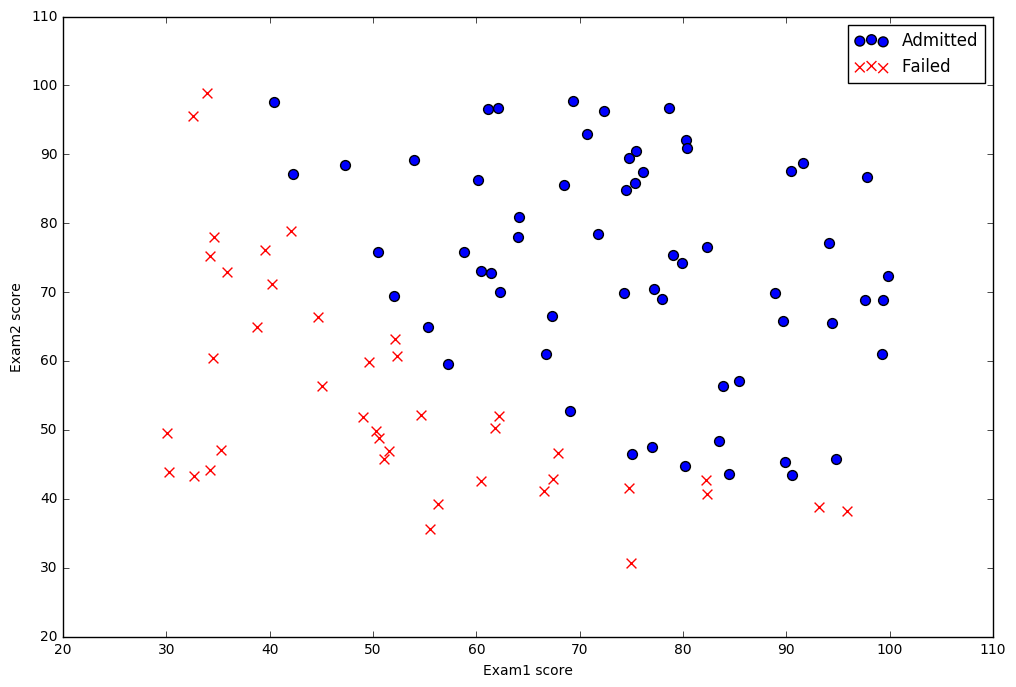

In [6]:
# scatterplot 으로 그려보자
# 1개의 그래프 상에 합격자와 불합격자를 구분되게 다르게 표현해 준다. 

def plotData():
    fig, ax = plt.subplots(figsize=(12,8))

    # ax.scatter(x, y, size, color, marker, label)
    ax.scatter(positive['Exam1'], positive['Exam2'], \
              s=50, c='b', marker='o', label='Admitted')
    ax.scatter(negative['Exam1'], negative['Exam2'], \
              s=50, c='r', marker='x', label='Failed')
    ax.legend()
    ax.set_xlabel('Exam1 score')
    ax.set_ylabel('Exam2 score')
    
plotData()

In [7]:
# Training Set 을 정리해 주자.

# 우선 모든 x0에 1을 대입해 준다. 

data.insert(0, "Ones", 1)

In [8]:
data.head()

,Ones,Exam1,Exam2,Admitted
0,1,34.623660,78.024693,0
1,1,30.286711,43.894998,0
2,1,35.847409,72.902198,0
3,1,60.182599,86.308552,1
4,1,79.032736,75.344376,1


In [9]:
# X 와 y 를 만들어 주자

X = data.iloc[:, 0:3]
y = data.iloc[:, 3:4]

In [10]:
X.head()

,Ones,Exam1,Exam2
0,1,34.623660,78.024693
1,1,30.286711,43.894998
2,1,35.847409,72.902198
3,1,60.182599,86.308552
4,1,79.032736,75.344376


In [11]:
y.head()

,Admitted
0,0
1,0
2,0
3,1
4,1


In [12]:
# numpy array로 변환하고 theta 도 만들어 주자.

X = np.array(X)
y = np.array(y)

theta = np.zeros(3)

In [13]:
X.shape, y.shape, theta.shape

((100, 3), (100, 1), (3,))

# 2단계. 모델 구현

In [14]:
# sigmoid function 을 구현하자
# sigmoid function 은 연속적인 값을 가지는 입력값을 0~1 의 값으로 변환시켜 준다.
# 그러므로 0~1의 확률로 인식 가능 

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [15]:
# sigmoid 테스트
sigmoid(0)     # z = 0 일 때 sigmoid 는 0.5가 정상

0.5

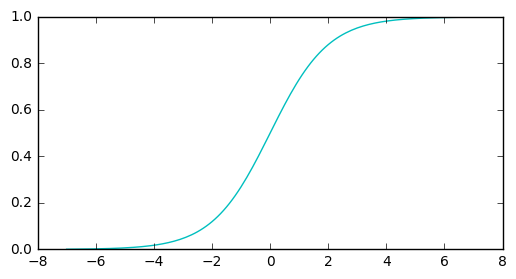

In [25]:
# sigmoid 그려서 증명해 보자

x = np.arange(-7,7, 0.1)

def plotSigmoid():
    fig, ax = plt.subplots(figsize=(6,3))
    ax.plot(x, sigmoid(x), 'c')
    
plotSigmoid()

In [29]:
# cost function 을 작성해 주자

def costFunction(theta, X, y):
    X = np.matrix(X)
    y = np.matrix(y)
    theta = np.matrix(theta)
    
    multiplication1 = np.multiply(-y, np.log(sigmoid(X*theta.T)))
    multiplication2 = np.multiply((1 - y), np.log(1 - sigmoid(X*theta.T)))
    return np.sum(multiplication1 - multiplication2)/(X.shape[0])

In [30]:
# 참고로 아래처럼 그냥 array로 cost function 구해줘도 된다. 

# X = np.array(X)
# y = np.array(y)
# theta = np.zeros((1,3))

# def costFunction(theta, X, y):
#     multiplication1 = -y*np.log(sigmoid(np.dot(X, theta.T)))
#     multiplication2 = (1 - y)*np.log(1 - sigmoid(np.dot(X, theta.T)))
#     return np.sum(multiplication1 - multiplication2)/X.shape[0]

In [31]:
# theta = 0 인 상태에서 테스트로 Cost Function을 구해 보자.

costFunction(theta, X, y)

0.69314718055994529

In [19]:
# 일반적으로는 이제 Gradient Descent 함수를 만들어서 Cost Function을 최소화 해 주는 theta의 값을 구하는 것이 순서이다. 
# 하지만 ex2에서는 이렇게 하지 않는다. 즉 GD 대신에 Advanced Optimization Method를 연습한다. 
# fminunc() 에서 필요로 하는 gradient (theta 업데이트 한단계) 만 구해 주기로 한다. (single gradient step)
# 즉 theta0, theta1, theta2 이상 3개의 벡터인 theta 한단계 (grad) 를 리턴한다.
# 한 단계이므로 alpha, iters 필요 없다. 
# grad를 실제 theta 에 반영해 주지도 않는다. 

def gradient(theta, X, y):
    X = np.matrix(X)
    y = np.matrix(y)
    theta = np.matrix(theta)
    
    grad = np.zeros(theta.shape[1])
    for j in range(X.shape[1]):
        grad[j] = np.sum(np.multiply(sigmoid(X*theta.T) - y, X[:,j]))/X.shape[0]
    return grad

In [20]:
gradient(theta, X, y)

array([ -0.1       , -12.00921659, -11.26284221])

In [41]:
# fminunc() 와 동일한 역할을 하는 SciPy의 fmin_tnc()를 사용하자.

import scipy.optimize as opt
result = opt.fmin_tnc(func=costFunction, x0=theta, fprime=gradient, args=(X, y))
# fmin_tnc 함수는 theta값(array), number of function evaluations, return code 를 반환한다. 중요한 건 theta값 (array)
theta_optimized = result[0]
print theta_optimized

[-25.16131861   0.20623159   0.20147149]


In [42]:
costFunction(theta_optimized, X, y)

0.20349770158947472

In [43]:
def predict(theta, X):
    probability = sigmoid(X*theta.T)
    return [1 if x>= 0.5 else 0 for x in probability]

In [49]:
predictions = predict(np.matrix(theta_optimized), X)
print predictions
correct = [1 if ((a==1 and b==1) or (a==0 and b==0)) else 0 for (a,b) in zip(predictions, y)]
accuracy = sum(map(int, correct)) % len(correct)     # map은 correct의 모든 원소를 int라는 함수에 전달. for문에 편의성 더한 것.
print 'accuracy = {}%'.format(accuracy)

# str.format 용례
# print('We are the {} who say "{}!"'.format('knights', 'Ni'))
# We are the knights who say "Ni!"

[0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1]
accuracy = 89%
